In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [88]:
dfl=pd.read_csv("../data/csgo_task.csv", index_col=0)

TypeError: 'numpy.ndarray' object is not callable

In [91]:
dfl["bomb_planted"].value_counts()

False    108726
True      13684
Name: bomb_planted, dtype: int64

In [2]:
df = pd.read_csv("../data/cs.csv", index_col=0)
display(df)

time_left  ct_score  t_score         map  bomb_planted  ct_health  \
25296       89.55       4.0      6.0    de_dust2         False      500.0   
50724       94.95       5.0      8.0   de_mirage         False      498.0   
93926       94.91      14.0     11.0  de_vertigo         False      500.0   
97917       73.83      15.0     14.0   de_mirage         False      500.0   
53550      109.91       6.0      9.0    de_train         False      500.0   
...           ...       ...      ...         ...           ...        ...   
122390      12.26      10.0     13.0    de_train          True      180.0   
122399      20.27      11.0     13.0    de_train          True      174.0   
122400       0.24      11.0     13.0    de_train          True      119.0   
122404      35.41      11.0     14.0    de_train          True      315.0   
122405      15.41      11.0     14.0    de_train          True      200.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
25296      500.0     500.0    500.0    1450.0   1500.0         1.0        5.0   
50724      400.0     498.0      0.0    6900.0   8400.0         5.0        0.0   
93926      489.0     500.0    397.0    1300.0  45600.0         3.0        5.0   
97917      500.0     500.0    500.0     900.0    600.0         4.0        3.0   
53550      500.0     400.0    300.0     700.0   1350.0         0.0        0.0   
...          ...       ...      ...       ...      ...         ...        ...   
122390       0.0     197.0      0.0    1150.0      0.0         1.0        0.0   
122399     239.0     200.0    284.0    2000.0   2200.0         2.0        3.0   
122400     178.0     182.0    195.0    2300.0    950.0         2.0        2.0   
122404     428.0     382.0    467.0     150.0   5700.0         2.0        5.0   
122405     242.0     195.0    359.0     100.0   5950.0         2.0        4.0   

        ct_defuse_kits  ct_players_alive  t_players_alive  
25296              2.0               5.0              5.0  
50724              3.0               5.0              4.0  
93926              0.0               5.0              5.0  
97917              3.0               5.0              5.0  
53550              1.0               5.0              5.0  
...                ...               ...              ...  
122390             1.0               2.0              0.0  
122399             2.0               2.0              3.0  
122400             2.0               2.0              2.0  
122404             2.0               4.0              5.0  
122405             1.0               2.0              4.0  

[26414 rows x 16 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26414 entries, 25296 to 122405
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_left         26414 non-null  float64
 1   ct_score          26414 non-null  float64
 2   t_score           26414 non-null  float64
 3   map               26414 non-null  object 
 4   bomb_planted      26414 non-null  bool   
 5   ct_health         26414 non-null  float64
 6   t_health          26414 non-null  float64
 7   ct_armor          26414 non-null  float64
 8   t_armor           26414 non-null  float64
 9   ct_money          26414 non-null  float64
 10  t_money           26414 non-null  float64
 11  ct_helmets        26414 non-null  float64
 12  t_helmets         26414 non-null  float64
 13  ct_defuse_kits    26414 non-null  float64
 14  ct_players_alive  26414 non-null  float64
 15  t_players_alive   26414 non-null  float64
dtypes: bool(1), float64(14), object(1)


In [113]:
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26414 entries, 25296 to 122405
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_left         26414 non-null  float64
 1   ct_score          26414 non-null  float64
 2   t_score           26414 non-null  float64
 3   map               26414 non-null  object 
 4   bomb_planted      26414 non-null  bool   
 5   ct_health         26414 non-null  float64
 6   t_health          26414 non-null  float64
 7   ct_armor          26414 non-null  float64
 8   t_armor           26414 non-null  float64
 9   ct_money          26414 non-null  float64
 10  t_money           26414 non-null  float64
 11  ct_helmets        26414 non-null  float64
 12  t_helmets         26414 non-null  float64
 13  ct_defuse_kits    26414 non-null  float64
 14  ct_players_alive  26414 non-null  float64
 15  t_players_alive   26414 non-null  float64
dtypes: bool(1), float64(14), object(1)


In [114]:
df1.loc[df1["bomb_planted"] == False, "bomb_planted"] = 0
df1.loc[df1["bomb_planted"] == True, "bomb_planted"] = 1
df1["bomb_planted"] = df1["bomb_planted"].astype(int)
df1=df1.drop(["map", "ct_defuse_kits", "time_left"], axis=1)

scaler = StandardScaler()
scaler.fit(df1)
scale = scaler.transform(df1)
df2 = pd.DataFrame(scale, columns=df1.columns)
df2.loc[df2["bomb_planted"] == -1, "bomb_planted"] = 0
display(df2)

ct_score   t_score  bomb_planted  ct_health  t_health  ct_armor  \
0     -0.541749 -0.147040           0.0   1.128617  1.067608  1.518766   
1     -0.333816  0.272026           0.0   1.116624  0.454930  1.506383   
2      1.537584  0.900625           0.0   1.128617  1.000214  1.518766   
3      1.745518  1.529224           0.0   1.128617  1.067608  1.518766   
4     -0.125883  0.481559           0.0   1.128617  1.067608  0.899642   
...         ...       ...           ...        ...       ...       ...   
26409  0.705851  1.319691           1.0  -0.790307 -1.995783 -0.357178   
26410  0.913784  1.319691           1.0  -0.826287 -0.531482 -0.338604   
26411  0.913784  1.319691           1.0  -1.156102 -0.905216 -0.450046   
26412  0.913784  1.529224           1.0   0.019239  0.626480  0.788200   
26413  0.913784  1.529224           1.0  -0.670374 -0.513101 -0.369560   

        t_armor  ct_money   t_money  ct_helmets  t_helmets  ct_players_alive  \
0      1.367875 -0.604024 -0.722756   -0.399278   1.259134          1.058566   
1     -1.703753 -0.033957 -0.088326    2.051122  -1.425752          1.058566   
2      0.735119 -0.619713  3.332078    0.825922   1.259134          1.058566   
3      1.367875 -0.661553 -0.805508    1.438522   0.185179          1.058566   
4      0.139224 -0.682473 -0.736548   -1.011878  -1.425752          1.058566   
...         ...       ...       ...         ...        ...               ...   
26409 -1.703753 -0.635403 -0.860676   -0.399278  -1.425752         -0.869156   
26410  0.040931 -0.546494 -0.658394    0.213322   0.185179         -0.869156   
26411 -0.505818 -0.515114 -0.773327    0.213322  -0.351798         -0.869156   
26412  1.165147 -0.740003 -0.336581    0.213322   1.259134          0.415992   
26413  0.501676 -0.745233 -0.313595    0.213322   0.722156         -0.869156   

       t_players_alive  
0             0.888384  
1             0.224064  
2             0.888384  
3             0.888384  
4             0.888384  
...                ...  
26409        -2.433215  
26410        -0.440256  
26411        -1.104576  
26412         0.888384  
26413         0.224064  

[26414 rows x 13 columns]

In [48]:
df1.to_csv("../data/cs_pred.csv")

In [116]:
X = df1.drop(["bomb_planted"], axis=1)
y = df1["bomb_planted"]
scaler = StandardScaler()
scaler.fit(X)
scale = scaler.transform(X)
X = pd.DataFrame(scale, columns=df1.drop(["bomb_planted"], axis=1).columns)
display(X)
display(y)
print(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

ct_score   t_score  ct_health  t_health  ct_armor   t_armor  ct_money  \
0     -0.541749 -0.147040   1.128617  1.067608  1.518766  1.367875 -0.604024   
1     -0.333816  0.272026   1.116624  0.454930  1.506383 -1.703753 -0.033957   
2      1.537584  0.900625   1.128617  1.000214  1.518766  0.735119 -0.619713   
3      1.745518  1.529224   1.128617  1.067608  1.518766  1.367875 -0.661553   
4     -0.125883  0.481559   1.128617  1.067608  0.899642  0.139224 -0.682473   
...         ...       ...        ...       ...       ...       ...       ...   
26409  0.705851  1.319691  -0.790307 -1.995783 -0.357178 -1.703753 -0.635403   
26410  0.913784  1.319691  -0.826287 -0.531482 -0.338604  0.040931 -0.546494   
26411  0.913784  1.319691  -1.156102 -0.905216 -0.450046 -0.505818 -0.515114   
26412  0.913784  1.529224   0.019239  0.626480  0.788200  1.165147 -0.740003   
26413  0.913784  1.529224  -0.670374 -0.513101 -0.369560  0.501676 -0.745233   

        t_money  ct_helmets  t_helmets  ct_players_alive  t_players_alive  
0     -0.722756   -0.399278   1.259134          1.058566         0.888384  
1     -0.088326    2.051122  -1.425752          1.058566         0.224064  
2      3.332078    0.825922   1.259134          1.058566         0.888384  
3     -0.805508    1.438522   0.185179          1.058566         0.888384  
4     -0.736548   -1.011878  -1.425752          1.058566         0.888384  
...         ...         ...        ...               ...              ...  
26409 -0.860676   -0.399278  -1.425752         -0.869156        -2.433215  
26410 -0.658394    0.213322   0.185179         -0.869156        -0.440256  
26411 -0.773327    0.213322  -0.351798         -0.869156        -1.104576  
26412 -0.336581    0.213322   1.259134          0.415992         0.888384  
26413 -0.313595    0.213322   0.722156         -0.869156         0.224064  

[26414 rows x 12 columns]

25296     0
50724     0
93926     0
97917     0
53550     0
         ..
122390    1
122399    1
122400    1
122404    1
122405    1
Name: bomb_planted, Length: 26414, dtype: int32

0    13207
1    13207
Name: bomb_planted, dtype: int64


In [117]:
pickle.dump(scaler, open("../models/cs_X_scaler.sav", 'wb'))

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [119]:
lr = LogisticRegression(max_iter=7000, penalty="l2")
lr.fit(X_train, y_train)

LogisticRegression(max_iter=7000)

In [120]:
y_pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')
print(y_pred)

Accuracy: 0.8780995646413023
Precision: 0.8528877588085725
Recall_score: 0.9076149980672594
F1: 0.8794007490636705
ROC_AUC: 0.8786962230692379
[1 0 1 ... 0 1 0]


In [121]:
import pickle

In [122]:
pickle.dump(lr, open("../models/cs_LinearClassifer.sav", 'wb'))

In [123]:
model = pickle.load(open("../models/cs_LinearClassifer.sav", 'rb'))

y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')
print(y_pred)

Accuracy: 0.8780995646413023
Precision: 0.8528877588085725
Recall_score: 0.9076149980672594
F1: 0.8794007490636705
ROC_AUC: 0.8786962230692379
[1 0 1 ... 0 1 0]


In [55]:
from collections import Counter
class Node:
    def __init__(self, feature = None, threshold = None, left = None, right = None, *, value = None):
        self.feature = feature #функция или индекс параметра по которому установлен порог
        self.threshold = threshold #порог
        self.left = left #указатель на левый узел
        self.right = right #на правый узел
        self.value = value #значения внутри
    def is_leaf_node(self): #проверка на лист (на конечный узел)
        return self.value is not None

class MyDecisionTreeClassifier:
    def __init__(self, min_samples_split = 2, max_depth = 5, n_features = None):
        self.min_samples_split = min_samples_split #минимальное возможное кол-во объектов для разбиения
        self.max_depth = max_depth #максимальная глубина\
        self.n_features = n_features #кол-во функций
        self.root = None #корень
        
    def fit(self, X_pd, y_pd):
        #проверка на наличие значения кол-ва функций
        X, y = np.array(X_pd), np.array(y_pd)
        if not self.n_features:
            self.n_features = X.shape[1]
        else:
            self.n_features = min(X.shape[1], self.n_features)
            
        self.root = self._grow_tree(X, y)
        
    def _grow_tree(self, X, y, depth = 0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y)) #определяем кол-во найденных классов для разбиения

        #проверка критерия остановки
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y) #определяем самый распространенный класс
            return Node(value = leaf_value)
        
        feat_idx = np.random.choice(n_feats, self.n_features, replace = False) #случайный выбор n_features функций из n_feats с запретом на повторение
        
        #нахождение лучшего разбиения
        best_feature, best_threshold =  self._best_split(X, y, feat_idx)
        
        #создание дочерних узлов
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_threshold, left, right)

        # вызвать def внутри созданных узлов 
    
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx] #!!
            thresholds = np.unique(X_column)        
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)#расчет прироста информации
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = threshold
                    
        return split_idx, split_threshold
    
    def _information_gain(self, y, X_column, threshold): #E(parent) - [weighted average] * E(child) ||| E - энтропия
        #энропия родителя
        parent_entropy = self._entropy(y)
        #создание потомка
        left_idxs, right_idxs = self._split(X_column, threshold)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        #средняя энтропия детей
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_enropy = (n_l/n) * e_l + (n_r/n) * e_r 
        
        #информационный прирост
        
        information_gain = parent_entropy - child_enropy
        return information_gain
        
    def _split(self, X_column, threshold):
        left_idxs = np.argwhere(X_column <= threshold).flatten()
        right_idxs = np.argwhere(X_column > threshold).flatten()
        return left_idxs, right_idxs
    
    def _entropy(self, y): #-sum(p(X) * log2(p(X)))
        hist = np.bincount(y)
        pX_all = hist / len(y)
        return - np.sum([p * np.log2(p) for p in pX_all if p > 0])
            
    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]
    
    def predict(self, X):
        
        return np.array([self._traverse_tree(x, self.root) for x in np.array(X)])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
            
        

In [56]:
class MyBaggingClassifier:
    def __init__(self, estimator, n_estimators = 9):
        self.estimator = estimator
        self.n_estimators = n_estimators
    def fit(self, X_pd, y_pd):
        X, y = np.array(X_pd), np.array(y_pd)
        estimators = list([])
        data_step = int(len(y)/self.n_estimators) 
        last_idx = 0
        for i in range(self.n_estimators - 1):
            X_sub = X[i * (data_step) : (i + 1) * (data_step) ]   
            y_sub = y[i * (data_step) : (i + 1) * (data_step) ]
            self.estimator.fit(X_sub, y_sub)
            estimators.append(self.estimator)
            last_idx += data_step
        self.estimator.fit(X[last_idx: len(y)], y[last_idx: len(y)])
        estimators.append(self.estimator)
        
        
        self.estimators = estimators
        return self
                          
    def predict(self, X_pd):
        X = np.array(X_pd)
        predicts = np.array([est.predict(X) for est in self.estimators])
        return [Counter(one_pred).most_common(1)[0][0] for one_pred in predicts.T]

In [57]:
my_tree_classifier = MyBaggingClassifier(estimator=MyDecisionTreeClassifier(max_depth=6), n_estimators=5)
my_tree_classifier.fit(X_train, y_train)

In [58]:
y_pred = my_tree_classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.8563316297558206
Precision: 0.8075370121130552
Recall_score: 0.9277155005798222
F1: 0.8634646519158121
ROC_AUC: 0.8577746642364986


In [59]:
pickle.dump(my_tree_classifier, open("../models/cs_MyBaggingClassifer.sav", 'wb'))

In [137]:
model = pickle.load(open("../models/cs_MyBaggingClassifer.sav", 'rb'))
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.9757713420405073
Precision: 0.9616973338340218
Recall_score: 0.9899497487437185
F1: 0.9756190476190475
ROC_AUC: 0.9760579604252717


In [144]:
class Relu():

    def callFunction(x):
        return np.maximum(0,x)

    def callDerivative(x):
        return np.where(x > 0, 1.0, 0.0)

class Sigmoid():

    def callFunction(x):
        return 1 / (1 + np.exp(-x))

    def callDerivative(x):
        return Sigmoid.callFunction(x) * (1- Sigmoid.callFunction(x))
class TangH():
    
    def callFunction(x):
        #return 1/(1+np.exp(-x))
        return (np.exp(x) - np.exp(-x)) / (np.exp(x)+np.exp(-x))

    def callDerivative(x):
        return 1 - TangH.callFunction(x) ** 2

In [145]:
class FCLayer():
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error 

class ActivationLayer():
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [146]:
class MeanSquaredError():
    def fun(y_true, y_pred):
        return np.mean(np.power(y_true-y_pred, 2))
    
    def derivative(y_true, y_pred):
        return 2*(y_pred-y_true)/y_true.size

In [147]:
class NN:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        samples = len(input_data)
        result = []

        for i in range(samples):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(*output)

        return result

    def fit(self, x_train, y_train, epochs, learning_rate):

        samples = len(x_train)

        for i in range(epochs):
            print("epoch ", i+1)
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

In [148]:
model_classification = NN()
model_classification.add(FCLayer(15, 10))
model_classification.add(ActivationLayer(TangH.callFunction, TangH.callDerivative))
model_classification.add(FCLayer(10, 5))
model_classification.add(ActivationLayer(TangH.callFunction, TangH.callDerivative))
model_classification.add(FCLayer(5, 1))
model_classification.add(ActivationLayer(Sigmoid.callFunction, Sigmoid.callDerivative))
model_classification.compile(MeanSquaredError.fun, MeanSquaredError.derivative)

In [150]:
X_clf= X_clf.reshape(X_clf.shape[0], 1, X_clf.shape[1])
model_classification.fit(X_train., y_train, epochs=15, learning_rate=0.001)


epoch  1


KeyError: 0

In [8]:
import tensorflow as tf

In [61]:
model_classification_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(11, activation="relu", input_shape=(12,)),
        tf.keras.layers.Dense(21, activation="relu"),
        tf.keras.layers.Dense(11, activation="relu"),
        tf.keras.layers.Dense(5, activation="relu"),
        # сначала используем 1 нейрон и sigmoid
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
# в качестве функции активации используется бинарная  кроссэнтропия
model_classification_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy")
# verbose=None - не будет логов
model_classification_1.fit(X_train, y_train, epochs=50, verbose=None) #

In [62]:
model_classification_1.save("../models/cs_TfClissification")

INFO:tensorflow:Assets written to: ../models/cs_TfClissification\assets


INFO:tensorflow:Assets written to: ../models/cs_TfClissification\assets


In [63]:
md = tf.keras.models.load_model('../models/cs_TfClissification')
y_pred = np.around(md.predict(X_test))
print(np.unique(y_pred.T[0]))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

166/166 [==============================] - 0s 1ms/step
[0. 1.]
Accuracy: 0.8822638652280901
Precision: 0.8495197438633938
Recall_score: 0.9230769230769231
F1: 0.8847721378288256
ROC_AUC: 0.8830889066423191


In [135]:
# model_classification = tf.keras.Sequential(
#     [
#         tf.keras.layers.Input(shape=(14,)),
# #         tf.keras.layers.Dense(20, activation="relu"),
# #         tf.keras.layers.Dense(10, activation="tanh"),
# #         tf.keras.layers.Dropout(0.1),
#         tf.keras.layers.Dense(3, activation="tanh"),
# #         tf.keras.layers.Dense(32, activation="tanh"),
# #         tf.keras.layers.Dense(16, activation="tanh"),
#         tf.keras.layers.Dense(1, activation="sigmoid")
#     ]
# )
model_classification_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(11, activation="relu", input_shape=(12,)),
#         tf.keras.layers.Dense(21, activation="relu"),
        tf.keras.layers.Dense(11, activation="relu"),
        tf.keras.layers.Dense(5, activation="relu"),
        # сначала используем 1 нейрон и sigmoid
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [136]:
model_classification_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy")

In [139]:
dann = []
acc = []
for i in range(20):
    model_classification_1.fit(X_train, y_train, epochs=i+1, verbose=None)
    y_pred = np.around(model_classification_1.predict(X_test))
    savedann = f1_score(y_test, y_pred)
    accsv = accuracy_score(y_test, y_pred)
    print(accsv)
    print(savedann)
    dann.append(savedann)
    acc.append(accsv)

166/166 [==============================] - 0s 2ms/step
0.8815067196668559
0.8858497447118892
166/166 [==============================] - 0s 1ms/step
0.8849138746924096
0.8871985157699444
166/166 [==============================] - 0s 1ms/step
0.8811281468862389
0.8856102003642987
166/166 [==============================] - 0s 1ms/step
0.8796138557637706
0.8848243390076059
166/166 [==============================] - 0s 1ms/step
0.8824531516183987
0.8859085063384163
166/166 [==============================] - 0s 2ms/step
0.8837781563505583
0.8865064695009242
166/166 [==============================] - 0s 1ms/step
0.8769638462994511
0.8826291079812206
166/166 [==============================] - 0s 1ms/step
0.8851031610827181
0.8880280391071758
166/166 [==============================] - 0s 1ms/step
0.8862388794245694
0.8883107229139565
166/166 [==============================] - 0s 1ms/step
0.8860495930342608
0.8883945124212087
166/166 [==============================] - 0s 1ms/step
0.8784781374219

In [162]:
model_classification.fit(X_train, y_train, epochs=25)

Epoch 1/25
661/661 [==============================] - 2s 1ms/step - loss: 0.6599
Epoch 2/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6599
Epoch 3/25
661/661 [==============================] - 1s 2ms/step - loss: 0.6594
Epoch 4/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6589
Epoch 5/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6587
Epoch 6/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6583
Epoch 7/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6582
Epoch 8/25
661/661 [==============================] - 1s 2ms/step - loss: 0.6578
Epoch 9/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6577
Epoch 10/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6581
Epoch 11/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6574
Epoch 12/25
661/661 [==============================] - 1s 1ms/step - loss: 0.6572
Epoch 13/25
661/661 [====

In [163]:
y_pred = model_classification.predict(X_test)
print(y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

166/166 [==============================] - 0s 1ms/step
[[0.5644018 ]
 [0.38592333]
 [0.5644018 ]
 ...
 [0.5644018 ]
 [0.5644018 ]
 [0.5644018 ]]


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt

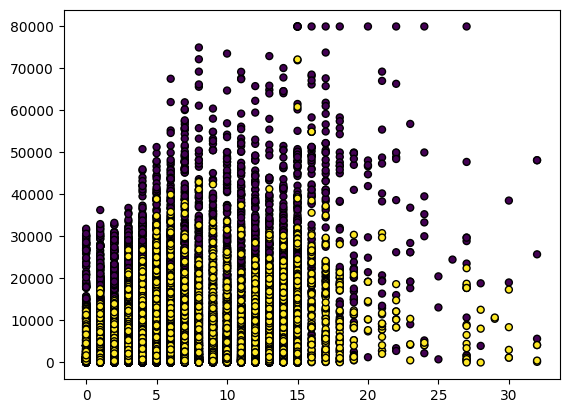

In [81]:

plt.scatter(np.array(df1)[:, 0], np.array(df1)[:, 7], marker="o", c=df1["bomb_planted"], s=25, edgecolor="k")
plt.show()

0 1


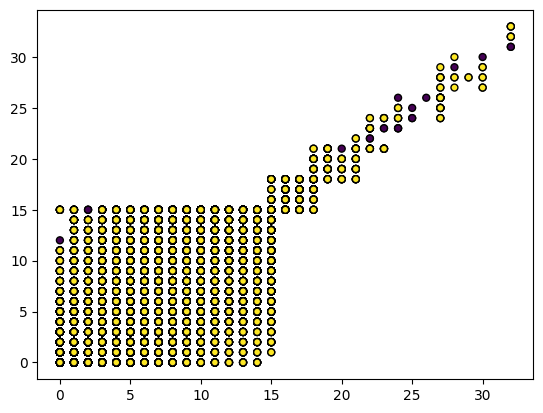

0 2


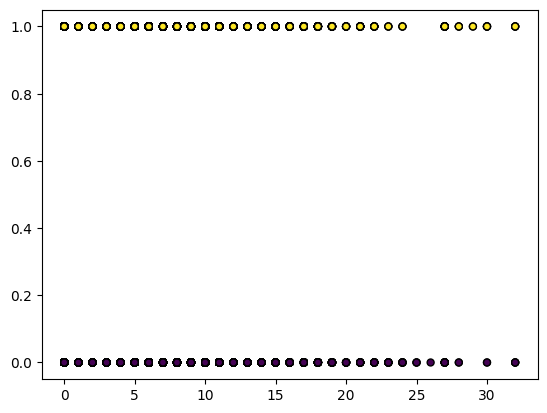

0 3


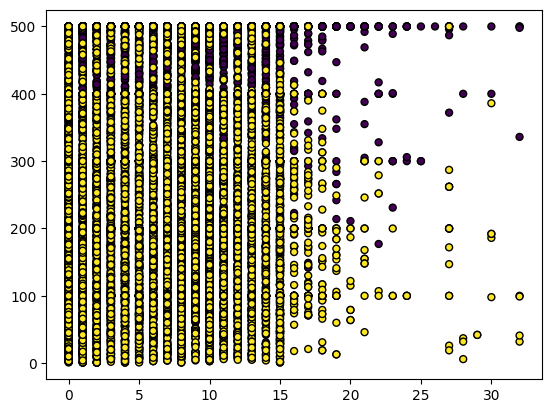

0 4


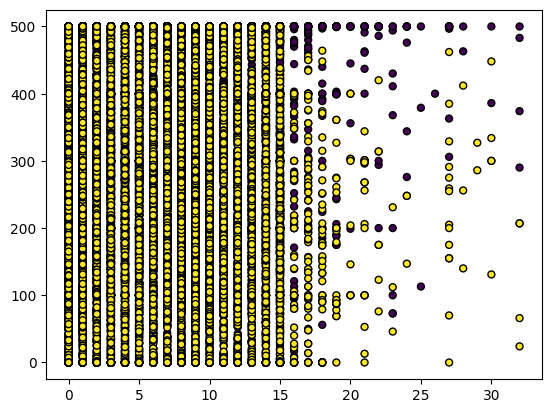

0 5


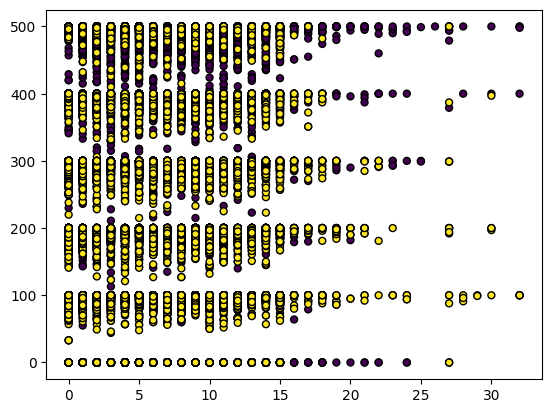

0 6


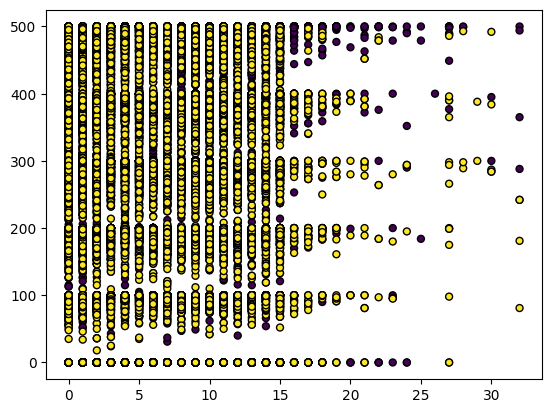

0 7


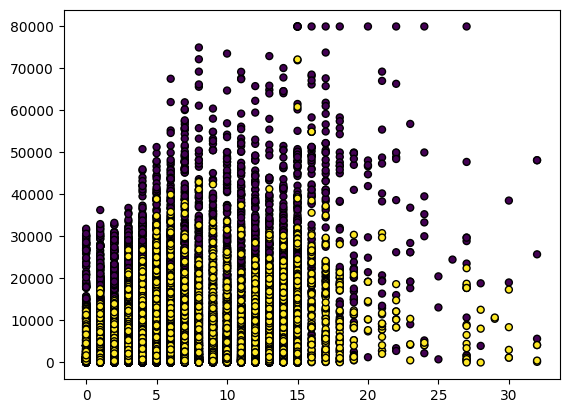

0 8


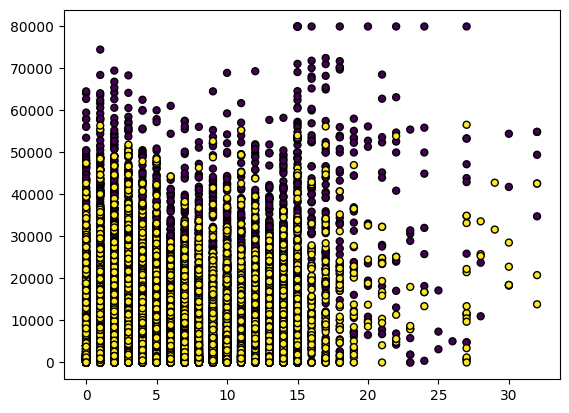

0 9


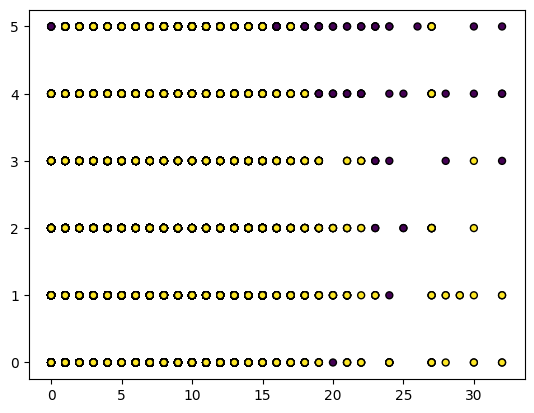

0 10


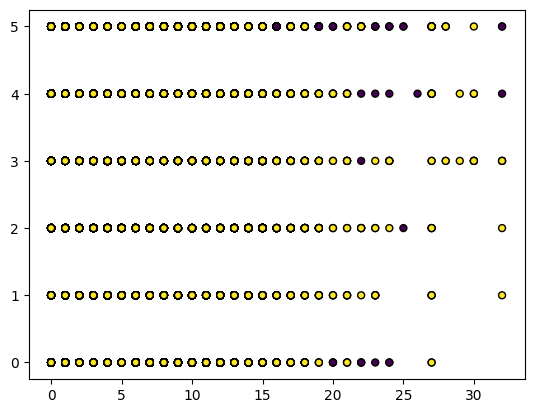

0 11


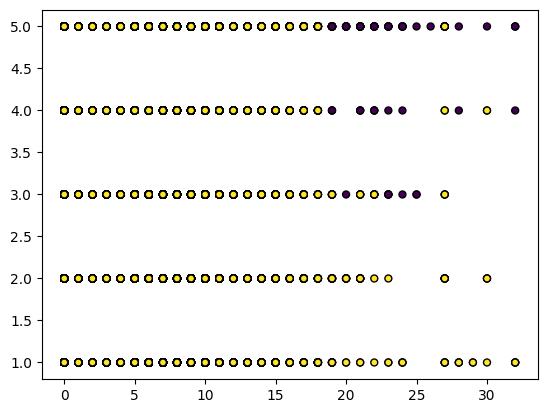

1 2


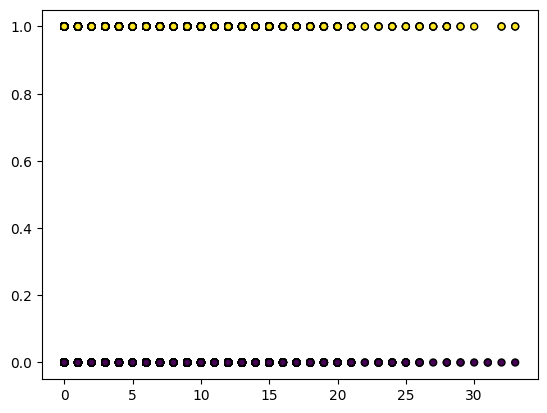

1 3


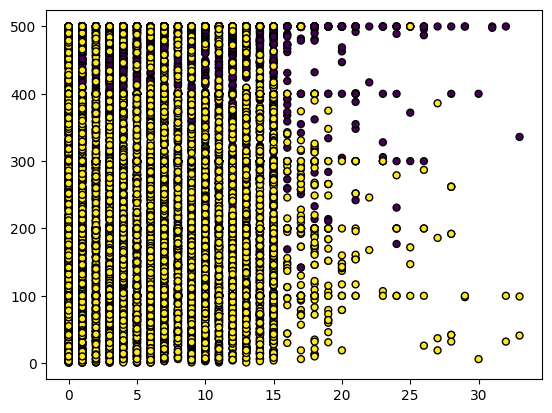

1 4


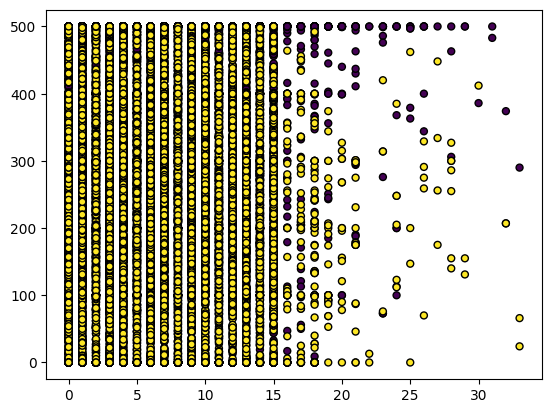

1 5


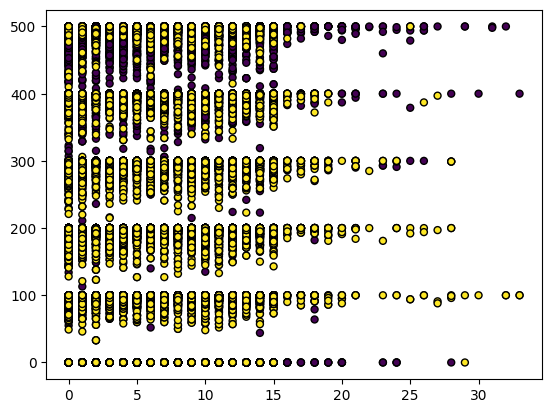

1 6


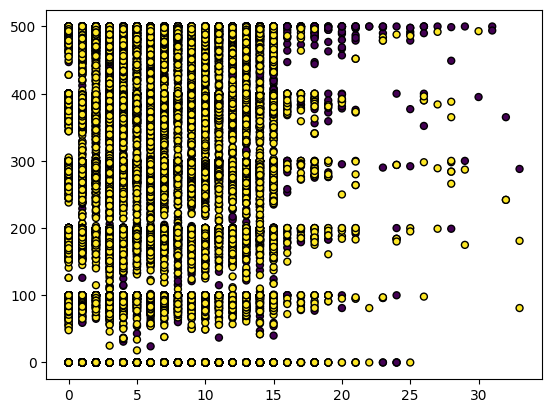

1 7


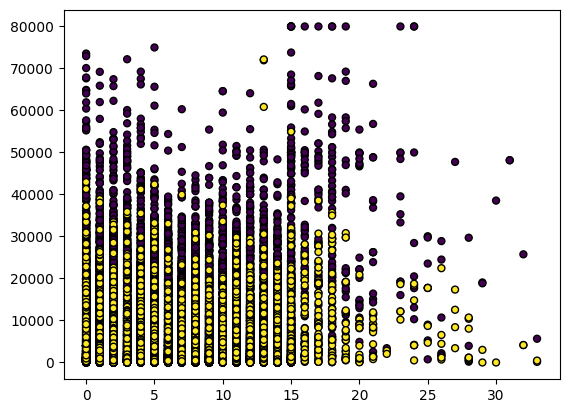

1 8


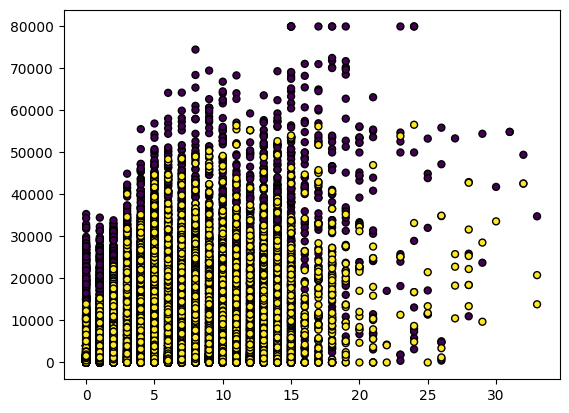

1 9


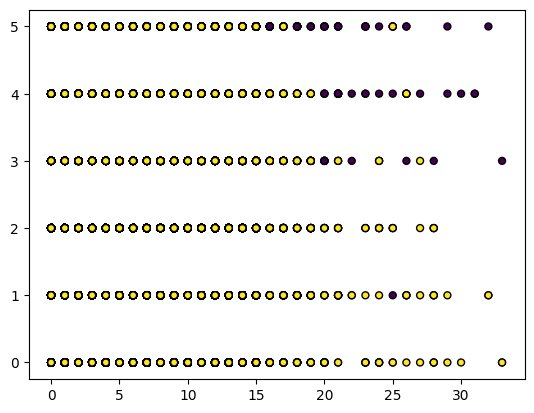

1 10


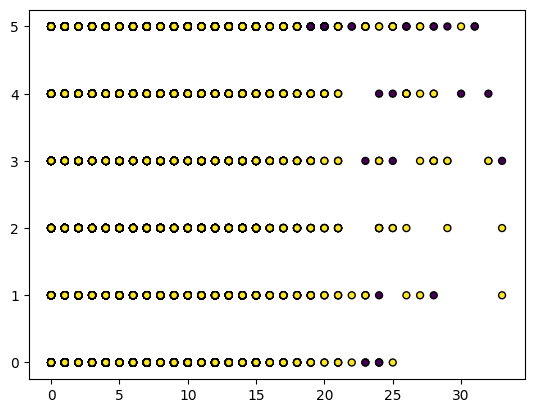

1 11


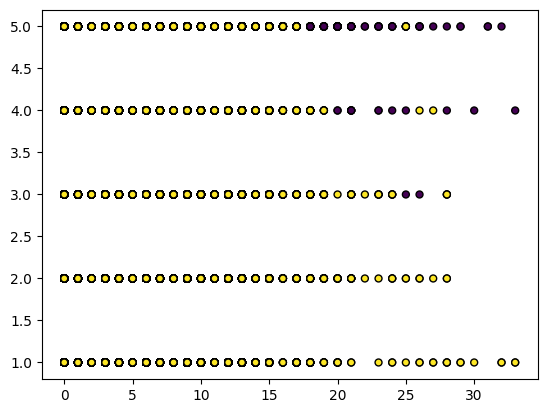

2 3


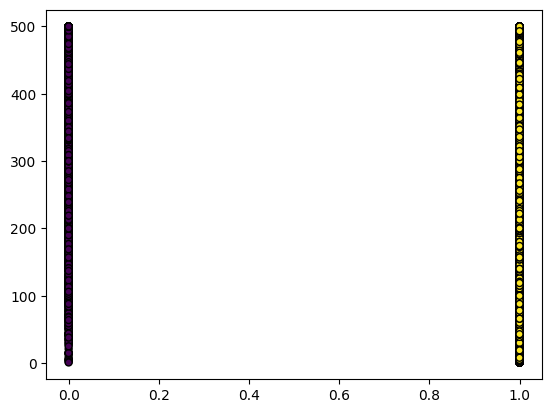

2 4


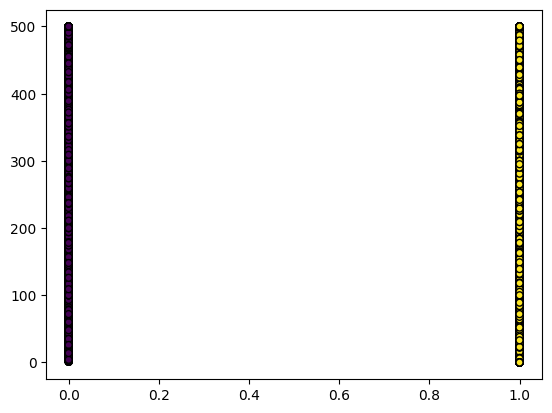

2 5


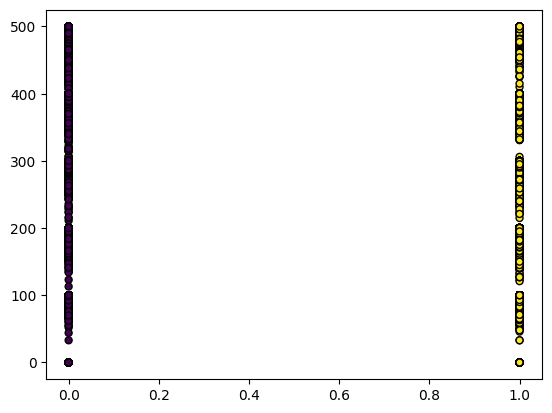

2 6


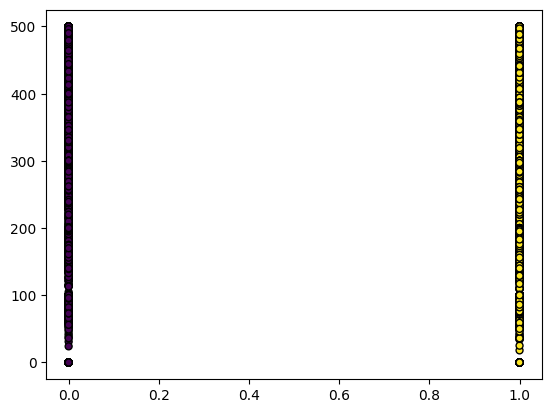

2 7


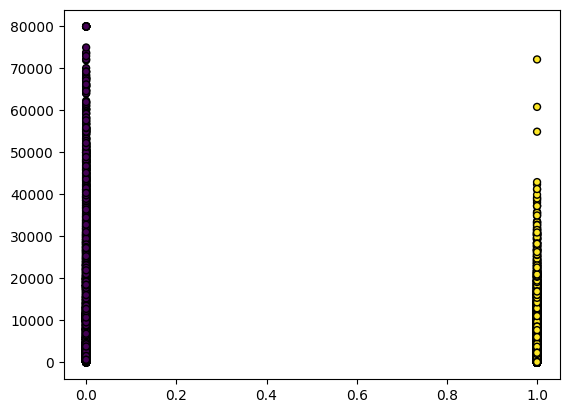

2 8


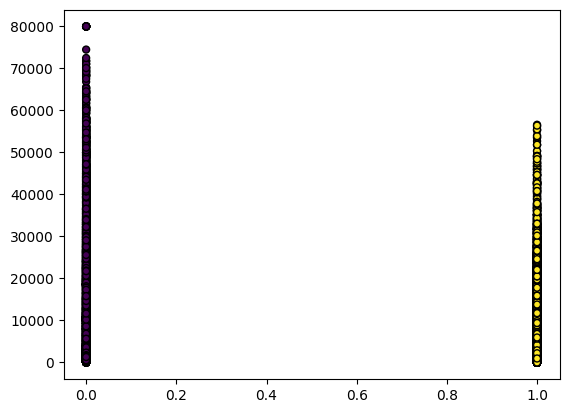

2 9


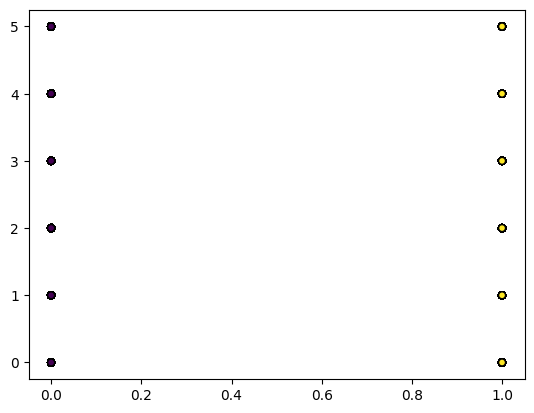

2 10


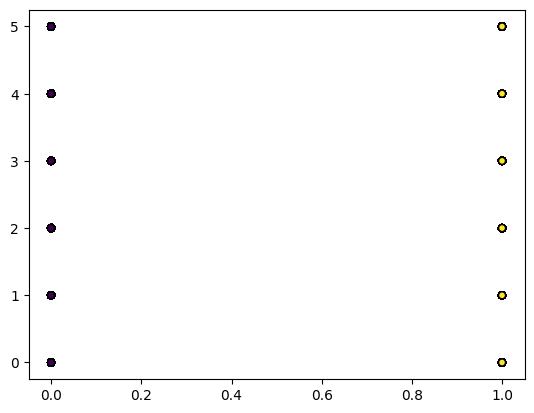

2 11


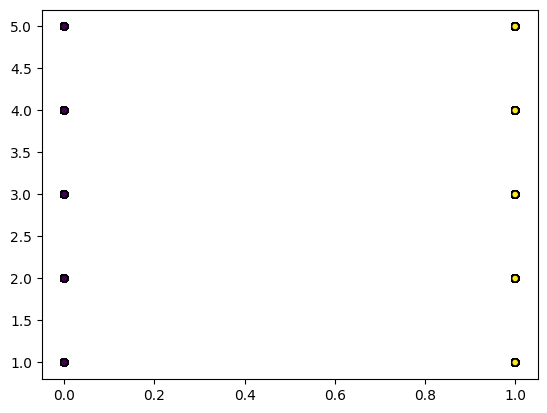

3 4


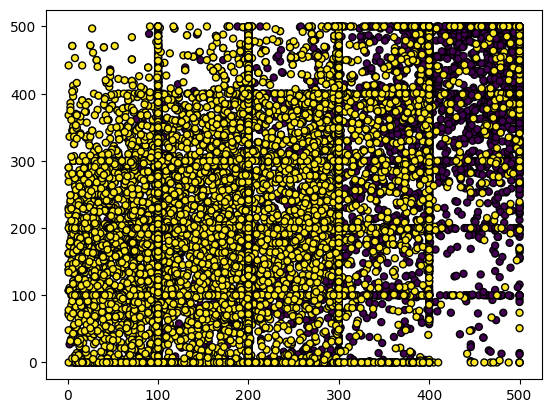

3 5


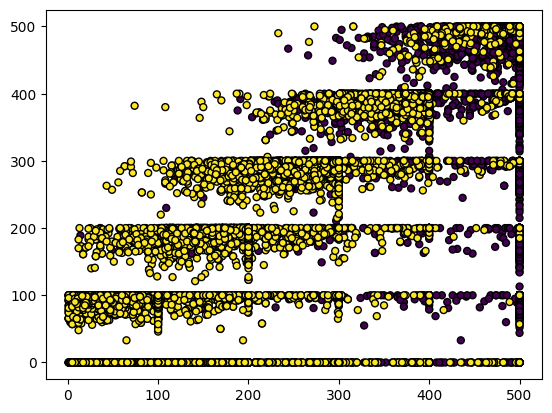

3 6


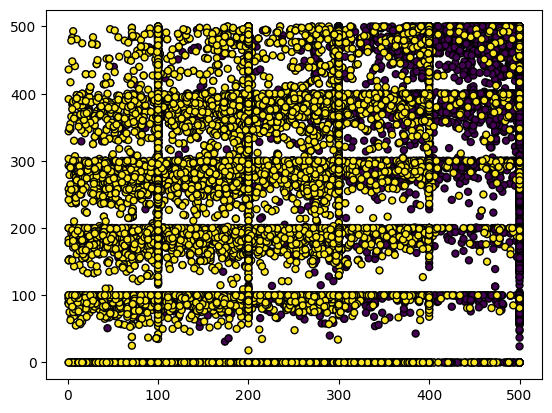

3 7


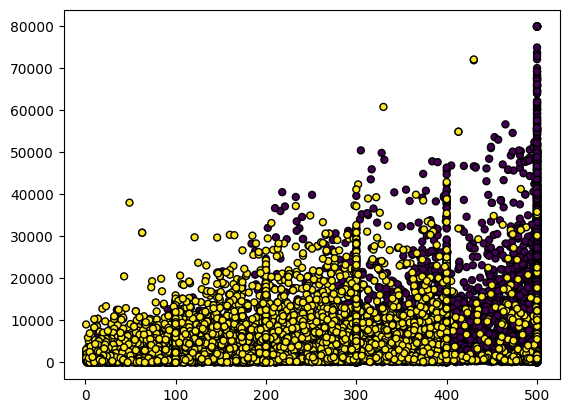

3 8


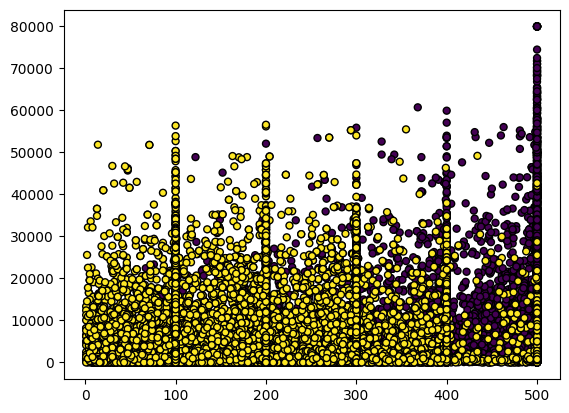

3 9


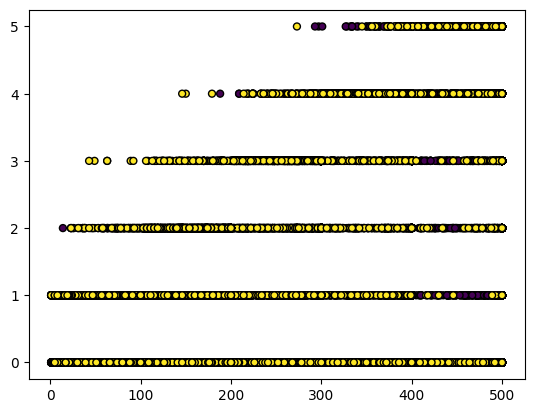

3 10


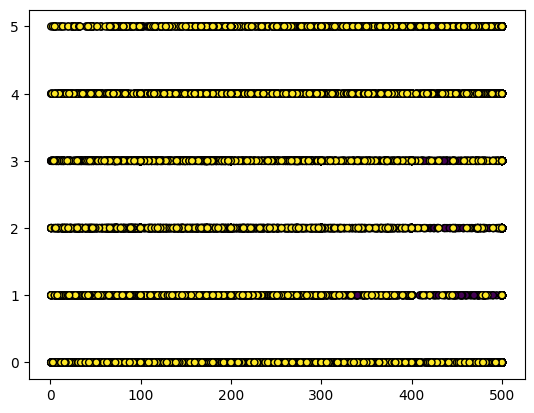

3 11


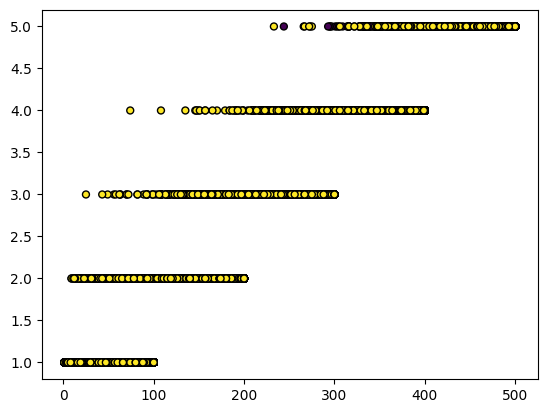

4 5


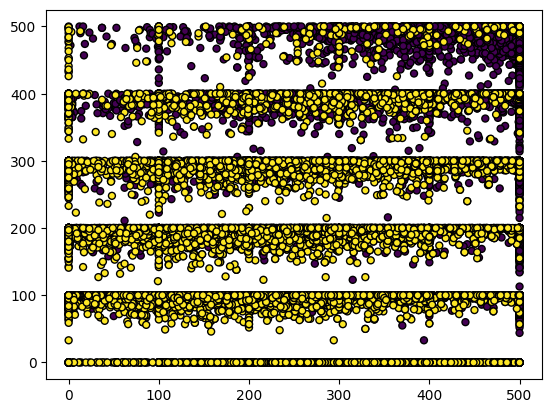

4 6


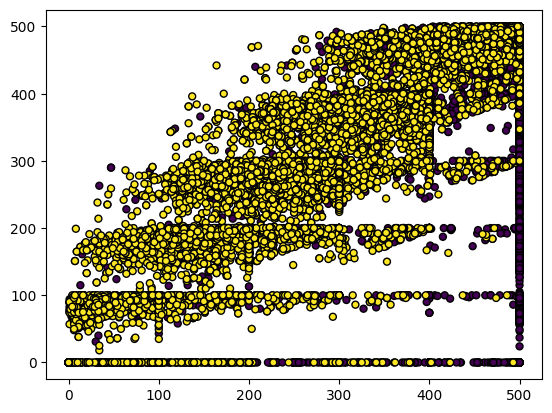

4 7


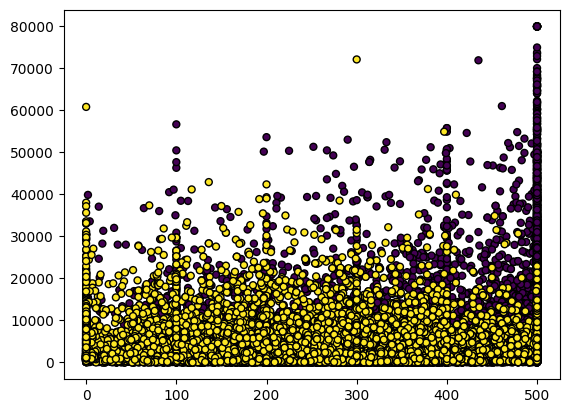

4 8


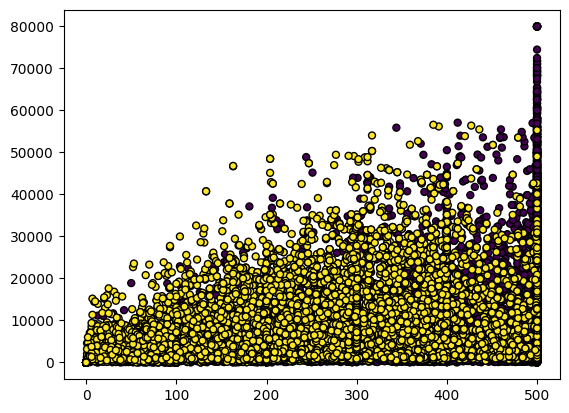

4 9


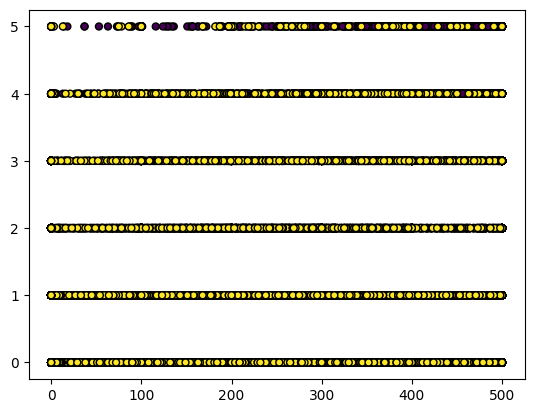

4 10


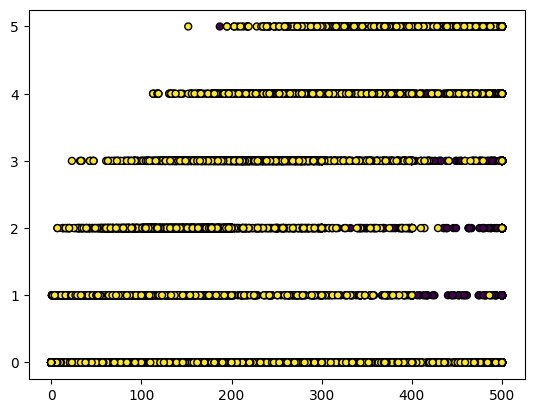

4 11


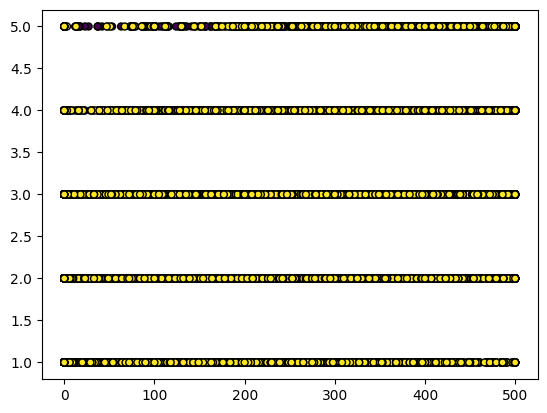

5 6


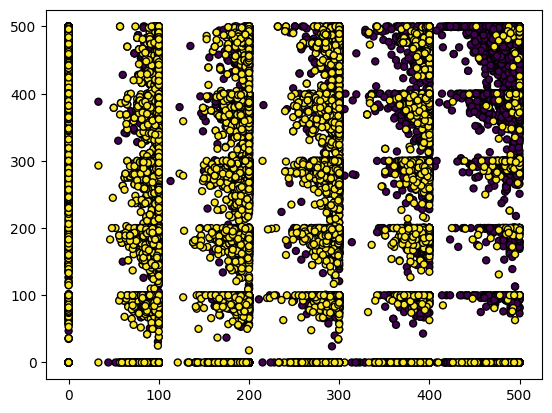

5 7


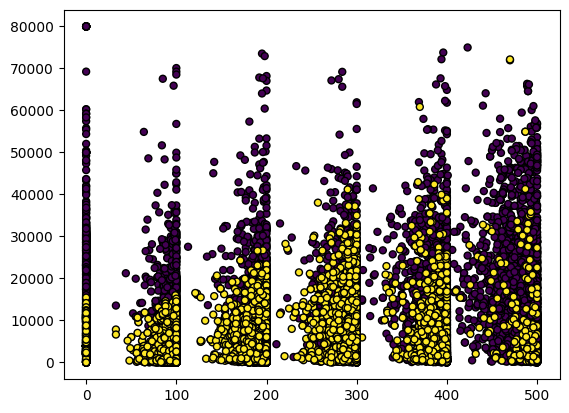

5 8


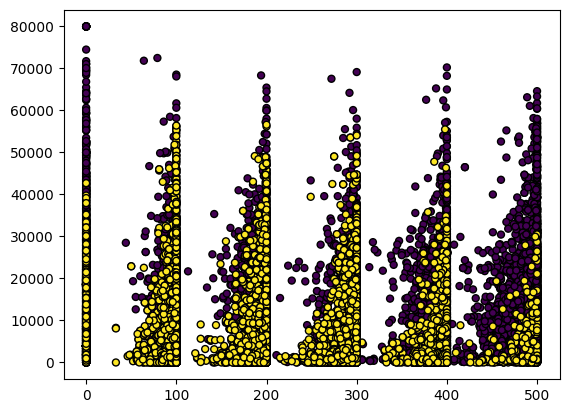

5 9


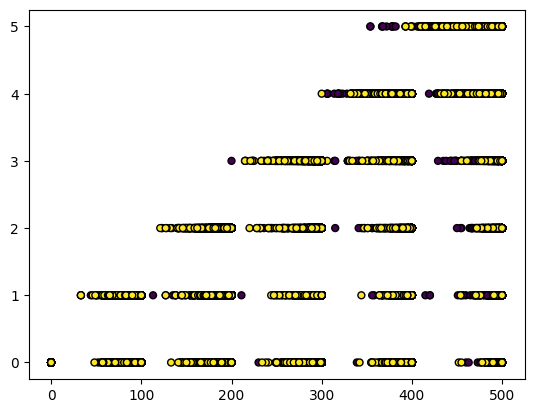

5 10


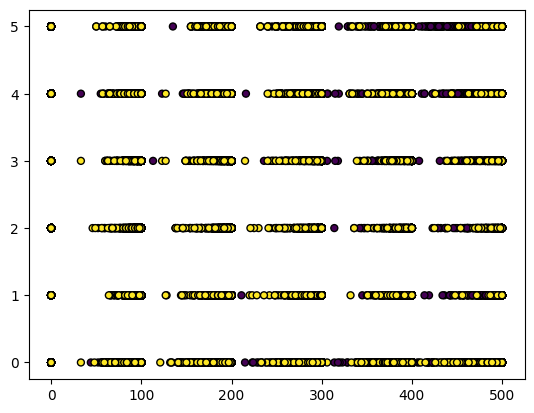

5 11


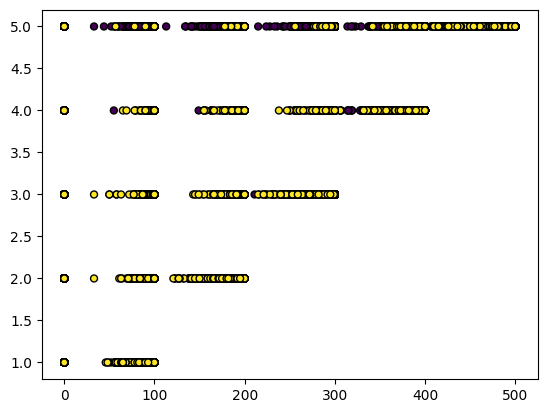

6 7


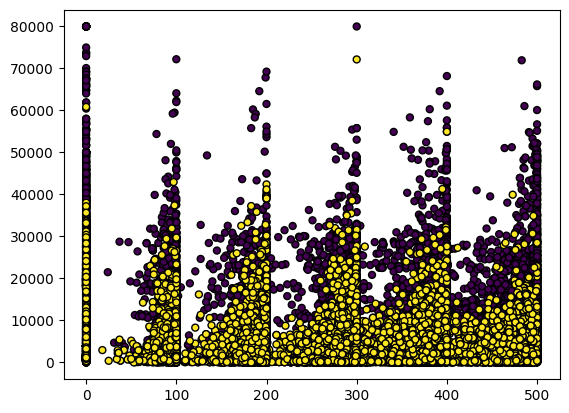

6 8


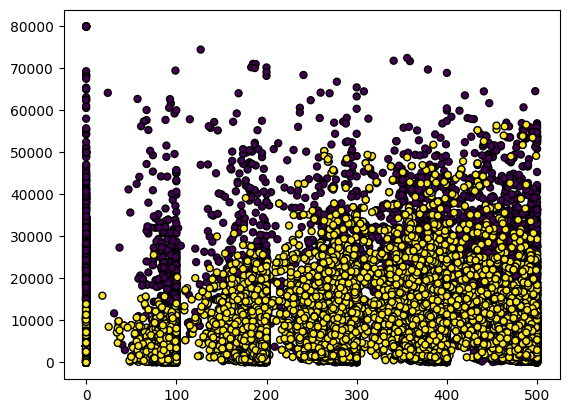

6 9


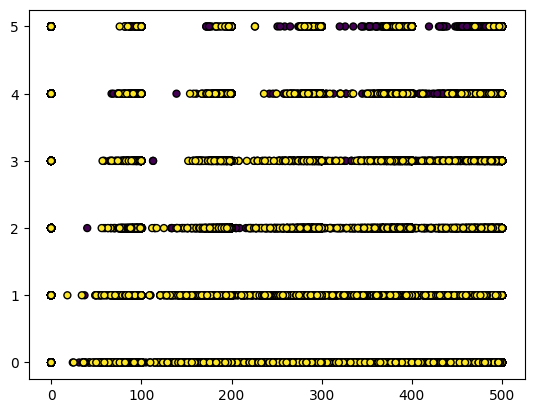

6 10


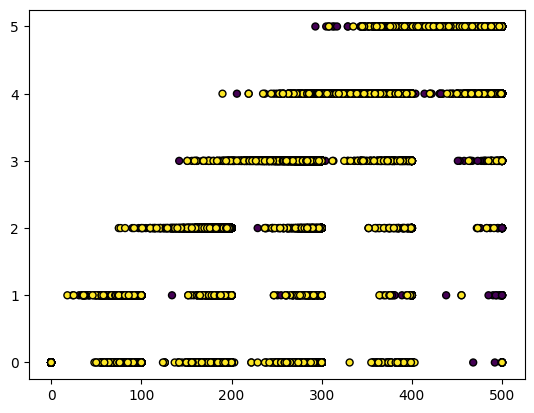

6 11


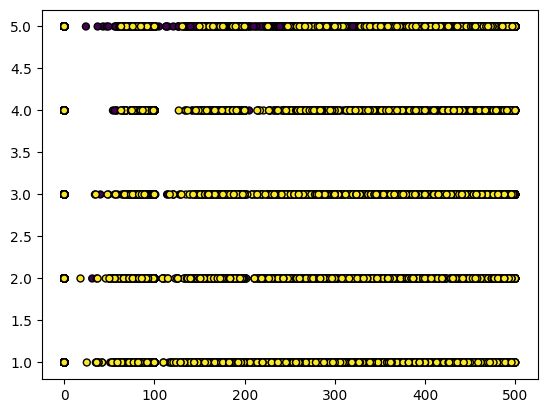

7 8


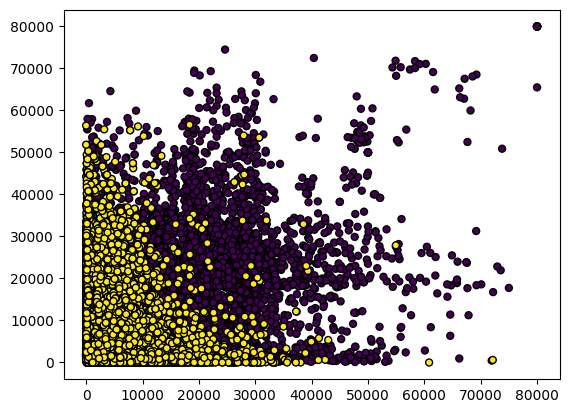

7 9


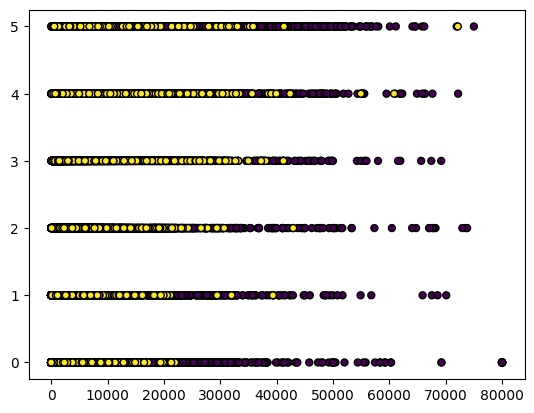

7 10


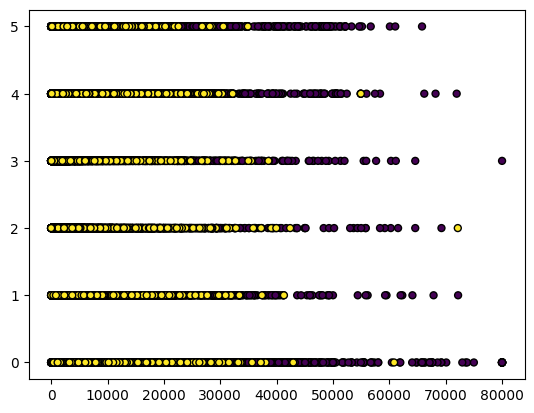

7 11


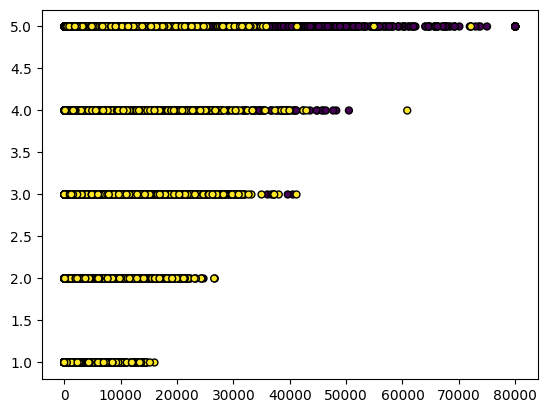

8 9


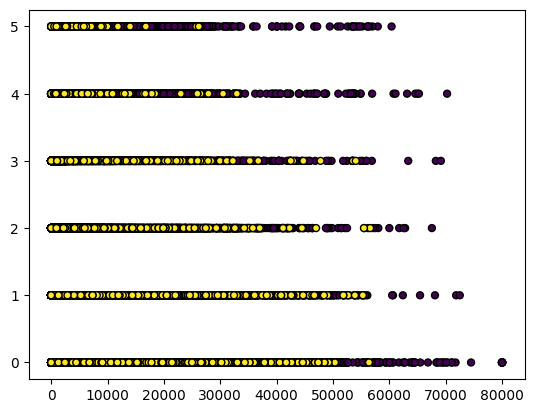

8 10


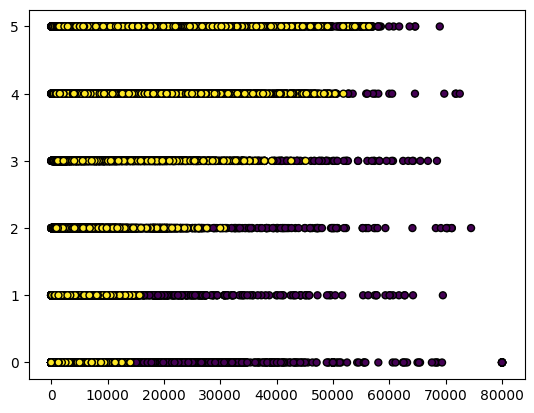

8 11


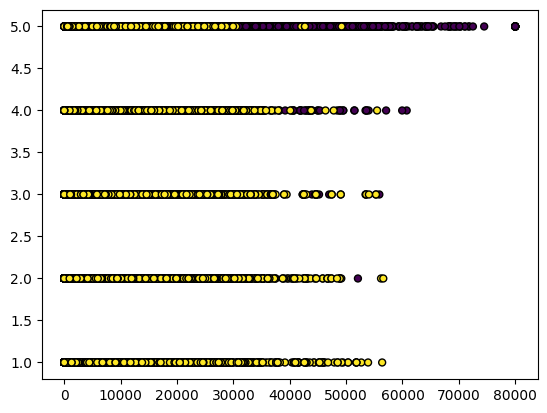

9 10


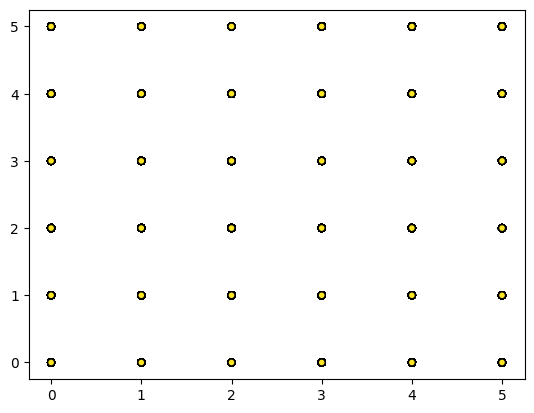

9 11


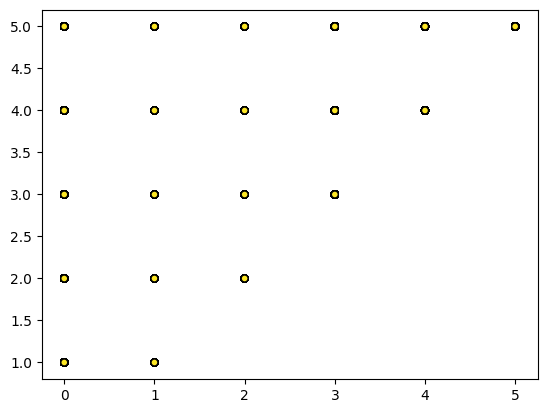

10 11


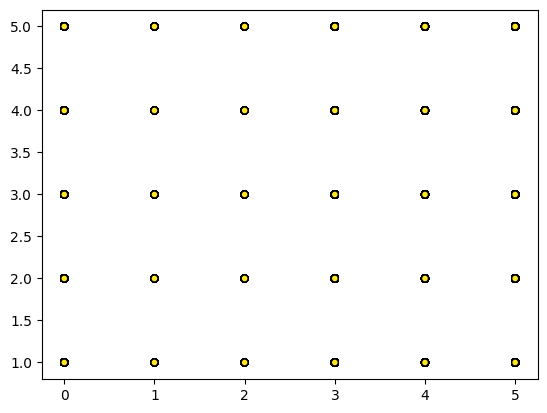

In [85]:
for i in range(12):
    for j in range(i + 1, 12):
        print(i, j)
        plt.scatter(np.array(df1)[:, i], np.array(df1)[:, j], marker="o", c=df1["bomb_planted"], s=25, edgecolor="k")
        plt.show()

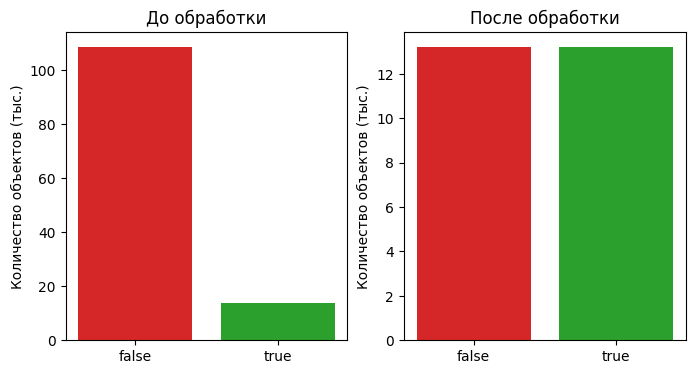

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))


# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)

fruits = ['false', 'true']
counts = [108.726, 13.684]

bar_colors = ['tab:red', 'tab:green']

ax1.bar(fruits, counts, color=bar_colors)

ax1.set_ylabel('Количество объектов (тыс.)')
ax1.set_title('До обработки')
counts = [13.207, 13.207]
ax2.bar(fruits, counts, color=bar_colors)

ax2.set_ylabel('Количество объектов (тыс.)')
ax2.set_title('После обработки')
plt.show()

In [ ]:
False    108726
True      13684 13207

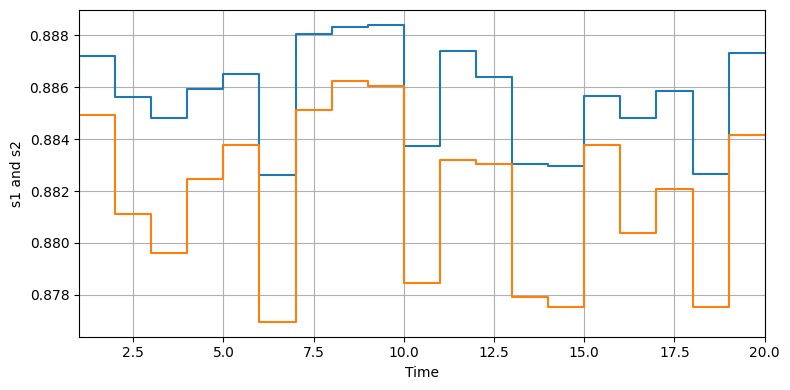

In [153]:
fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(range(1, 21),dann, range(1, 21), acc)
# plt.step(range(1, 21), dann, label='1')
ax.plot(range(1, 21), dann, label="1")
ax.plot(range(1, 21), acc, label="2")
ax.set_xlim(1, 20)
ax.set_xlabel('Time')
ax.set_ylabel('s1 and s2')
bar_labels = ['F1', 'accuracy']

ax.grid(True)



# fig.tight_layout()
plt.show()